# ML:I, ML:II Exercise 1 Programming Assignment 
## Master's CS4DM Ankit Suresh Satpute - 120825, Hsueh Wei - 120820, Sagar Nagaraj Simha - 120797

# Exercise 2_c 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### X : Denotes the feauture vector which contains values of age and mileage variable and an additional column of bias (1s). We then implement the formula for calculating weights for higher dimensional feature space. Finally we multiply the obtained weight vector with 'Age' value of 15 year old car and we get the extrapolated 'Stopping Distance'.

In [7]:
"""w = (XT*X)^−1 * XT * y"""
X = np.matrix([[5, 30530,1], [7, 90000,1], [15, 159899,1], [28, 270564,1]])  
StoppingDistance = np.matrix([50,79,124,300])
XXt = np.dot(X.transpose(),X)
XXti = np.linalg.inv(XXt)
XXti_xt = np.dot(XXti, X.transpose())
W = np.dot(XXti_xt, StoppingDistance.transpose())
print("The weights after considering the mileage and age of the cars are:\n", W)
print("Extrapolated average stopping distance for 15 year old car is:\n",np.dot(X[2], W))

The weights after considering the mileage and age of the cars are:
 [[ 1.28163977e+01]
 [-2.29034854e-04]
 [-6.42631756e+00]]
Extrapolated average stopping distance for 15 year old car is:
 [[149.19720329]]


# Exercise 2_d

#### Scatterplot of data and linear regression of variable (We take age variable in this case) Age: values of age variable given in table. StoppingDistance: The given data, StoppingDistance_estimated: Values calculated based on the weights obtained from question 1.a. w0 = -7.32, w1 = 10.59

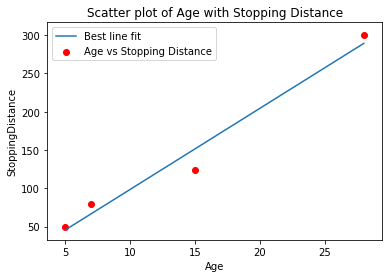

In [8]:
Age = X[:,0]
StoppingDistance_estimated = -7.32 + np.dot(10.59, Age)
plt.figure(0)
plt.plot(Age.tolist(), StoppingDistance_estimated.tolist(),label="Best line fit")
plt.xlabel("Age")
plt.ylabel("StoppingDistance")
plt.title("Scatter plot of Age with Stopping Distance")
plt.scatter(Age.tolist(), StoppingDistance.tolist(), color='red' ,label="Age vs Stopping Distance")
plt.legend()
plt.show()

# Exercise 3b

In [9]:
#The column names according to iris.names
col_names=['sepal length', 'sepal width', 'petal length', 'petal width','class'] 

In [10]:
# Reading from the csv file
flowerdata = pd.read_csv('iris.data', names=col_names)
flowerdata

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
#Splits and groups data according to the class variable
flowerdata_class = flowerdata.groupby(['class'])

In [12]:
# Provides default statistics about the data
flowerdata_class.describe()

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [13]:
# Gets the descriptions of the classes into a list
flowerclass = flowerdata_class.groups.keys()
flowerclass

dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

### Computes the mean, minimum and maximum of the petal width, petal length, sepal width and sepal length attributes for each of the three species of flower.

In [14]:
for class_ in flowerclass:
    print(class_)
    print(flowerdata_class.get_group(class_).describe().loc[['mean','min', 'max']])    

Iris-setosa
      sepal length  sepal width  petal length  petal width
mean         5.006        3.418         1.464        0.244
min          4.300        2.300         1.000        0.100
max          5.800        4.400         1.900        0.600
Iris-versicolor
      sepal length  sepal width  petal length  petal width
mean         5.936         2.77          4.26        1.326
min          4.900         2.00          3.00        1.000
max          7.000         3.40          5.10        1.800
Iris-virginica
      sepal length  sepal width  petal length  petal width
mean         6.588        2.974         5.552        2.026
min          4.900        2.200         4.500        1.400
max          7.900        3.800         6.900        2.500


## Observation - Based on 'petal length' and 'petal width', Iris-setosa is easier to distinguish, while it is comparitively hard to distinguish between Iris-versicolor and Iris-virginica

#  Exercise 3c

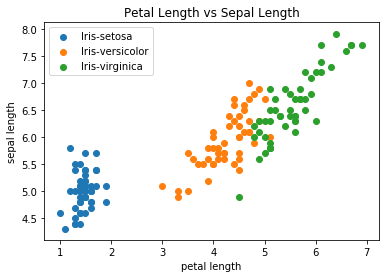

In [15]:
#Plots the Petal Length vs Sepal Length of the three different classes of flowers
plt.figure(1)
for class_ in flowerclass:
    x = flowerdata_class.get_group(class_)['petal length']
    y = flowerdata_class.get_group(class_)['sepal length']
    plt.scatter(x, y, label=class_)
plt.title('Petal Length vs Sepal Length')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

#  Exercise 3d

In [16]:
# Slicing sepal length of Iris-setosa
print('Iris-setosa')
flowerdata_class.get_group('Iris-setosa')['sepal length']

Iris-setosa


0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length, dtype: float64

In [17]:
# Slicing sepal length of Iris-virginica
print('Iris-virginica')
flowerdata_class.get_group('Iris-virginica')['sepal length']

Iris-virginica


100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, dtype: float64

In [18]:
# Enumerating the Class variable Iris-setosa as 1 and Iris-virginica as -1, since we are looking to build an LMS algorithms
Setosa_SepalLength = pd.DataFrame(flowerdata_class.get_group('Iris-setosa')['sepal length'])
Setosa_SepalLength['Class'] = 1
Virginica_SepalLength = pd.DataFrame(flowerdata_class.get_group('Iris-virginica')['sepal length'])
Virginica_SepalLength['Class'] = -1

In [19]:
#Concatenating both the sepal length data for both the classes together
Class_SepalLength = pd.concat([Setosa_SepalLength, Virginica_SepalLength], ignore_index=True)
Class_SepalLength

,sepal length,Class
0,5.1,1
1,4.9,1
2,4.7,1
3,4.6,1
4,5.0,1
...,...,...
95,6.7,-1
96,6.3,-1
97,6.5,-1
98,6.2,-1


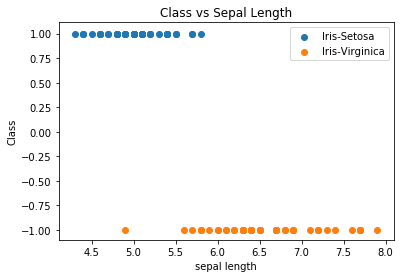

In [20]:
#Plotting the Class vs sepal Length for the two classes
x = Setosa_SepalLength['sepal length']
y = Setosa_SepalLength['Class']
plt.figure(2)
plt.scatter(x, y, label="Iris-Setosa")

x = Virginica_SepalLength['sepal length']
y = Virginica_SepalLength['Class']
plt.scatter(x, y, label="Iris-Virginica")

plt.title('Class vs Sepal Length')
plt.xlabel('sepal length')
plt.ylabel('Class')
plt.legend()
plt.show()

## Least Mean Squares

In [21]:
# The convergence function
def convergence(w_):
    c = Class_SepalLength['Class']
    yD = w_[0] + np.dot(w_[1] , Class_SepalLength['sepal length'])
    rss = (np.power(c-yD,2)).sum()
    #print(rss)
    return rss

In [22]:
eta = 0.01 #Learning rate
#eta > 0.1  http://deeplearning.net/software/theano/tutorial/nan_tutorial.html, https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons

#w = np.zeros(2) #Initialize random weights. Initialized to zero
w = np.random.rand(2) #Initialize random weights. Initialized to a number between [0,1)
max_iterations = 5000 # Maximum number of iterations
RSS_limit = 1 # Desired RSS value 

iterations = 0
while((convergence(w)> RSS_limit) and iterations < max_iterations):
    index = random.randint(0,len(Class_SepalLength)-1)
    y = w[0] + w[1] * Class_SepalLength['sepal length'][index]
    error =  Class_SepalLength['Class'][index] - y
    delta_w = eta * error * Class_SepalLength['sepal length'][index]
    w += delta_w
    iterations += 1
print("Number of iterations:",iterations)
print("The weight vectors, w0 and w1:",np.round(w, 4)) # Rounding off to 4 decimal places
print("Residual sum of squares (RSS) for the weight vector:", np.round(convergence(w),4))

Number of iterations: 5000
The weight vectors, w0 and w1: [-0.2488  0.1322]
Residual sum of squares (RSS) for the weight vector: 149.2507


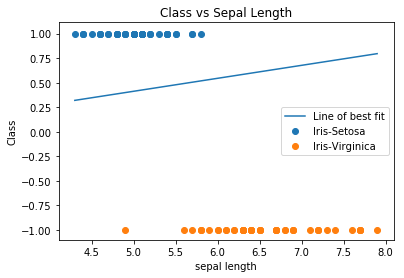

In [23]:
#Plotting the Class vs sepal Length for the two classes and the line of best fit
x = Setosa_SepalLength['sepal length']
y = Setosa_SepalLength['Class']
plt.figure(3)
plt.scatter(x, y, label="Iris-Setosa")

x = Virginica_SepalLength['sepal length']
y = Virginica_SepalLength['Class']
plt.scatter(x, y, label="Iris-Virginica")

plt.title('Class vs Sepal Length')
plt.xlabel('sepal length')
plt.ylabel('Class')
plt.legend()
#plt.show()

#Plot best fit line
x = np.linspace(min(Class_SepalLength['sepal length']),max(Class_SepalLength['sepal length']))
y = w[0]+w[1]*x
plt.figure(3) # Points to the above figure of matplotlib and overlaps a the best fit line
plt.plot(x, y, label="Line of best fit")
plt.legend()
plt.show()